# **CSC8635 Machine Learning Assignment**

### **Name**: Dimitrios Poulimenos - 200291237

### **Project 1**: (1) Tabular

# Project 1: Tabular dataset (50 marks)
The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

## **Introduction**

In this project, I will conduct a comprehensive analysis of US road traffic accidents using the FARS dataset, which comprises over 100,000 examples and 30 distinct features. My primary objective is to meticulously apply a range of preprocessing techniques to the dataset, enhancing its quality and suitability for analysis. Subsequently, I aim to develop and refine machine learning models capable of accurately predicting the severity of these road traffic accidents.

Starting the project the first step is to import all the essential libraries that will form the backbone of our analysis. This foundational phase ensures that we have access to the necessary tools and functionalities required for the in-depth processing and examination of the dataset at hand.

## **Libraries**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

With all the necessary libraries at our disposal, we now proceed to import the dataset, conveniently stored in CSV format on my drive, into our analytical workspace. This step brings the data into our immediate working environment, setting the stage for the in-depth analysis that follows.

## **Load The Data**

In [2]:
fars_data = pd.read_csv('fars.csv', header=0)

Now that we have the data, it's time for a very important part of our project - Exploratory Data Analysis (EDA). This step will help us understand the data better. By learning more about the data, we can choose the best ways to prepare it for further analysis.

## **Exploratory Data Analysis (EDA)**

**Basic Information of the Dataset**

In [3]:
# Basic information of the dataset
print("\nFars data info:")
fars_data.info()


Fars data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_RE

Looking the dataset, we are pleased to discover that it contains no missing values. This significantly eases the preprocessing phase, as we will not have to engage in imputing or eliminating rows with missing information. The dataset encompasses 30 features, of which only 5 are numerical, while the remaining 25 are categorical. This composition indicates the potential necessity of employing encoding techniques, a step that promises to be advantageous during the modeling stage. The dataset's substantial size, comprising 100,968 rows, offers a robust base for our analysis.

**Data Inspection**

In [4]:
fars_data.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


Next, we'll focus on visualizing the distribution of the 'INJURY_SEVERITY' column. This will enable us to observe the different categories it contains and understand their frequency within the dataset. 

**Injury Severity Distribution**

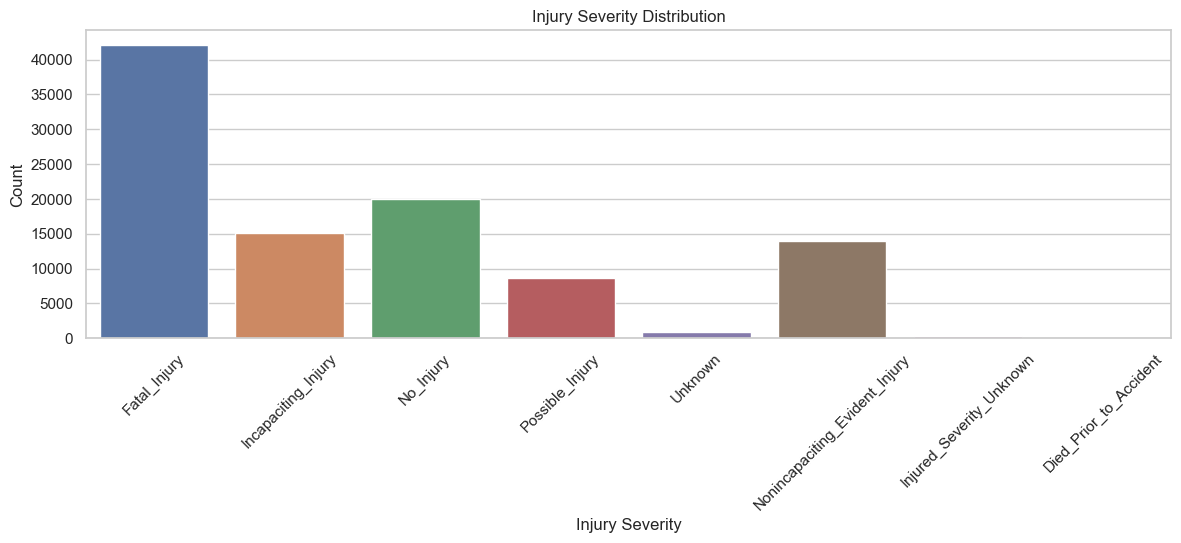

In [5]:
# Set the Seaborn palette
# Setting up the visualization style
sns.set(style="whitegrid")

# Injury Severity distribution
plt.figure(figsize=(14, 4))
sns.countplot(x='INJURY_SEVERITY', data=fars_data, hue='INJURY_SEVERITY')
plt.title('Injury Severity Distribution')
plt.xticks(rotation=45)
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.show()

The plot reveals a notable imbalance in the dataset: the 'Fatal_Injury' category significantly dominates, exceeding 4000 instances, while the other seven categories fluctuate below 2000 values each. This stark disparity suggests that our dataset is imbalanced, which could skew the performance of our predictive models. To address this, upsampling might be a necessary step to ensure a more balanced and reliable training set. Furthermore, categories such as 'Unknown', 'Injured_Severity_Unknown', and 'Died_Prior_to_Accident' appear to be less relevant for our analysis. Removing these categories during the preprocessing stage could streamline our dataset, potentially enhancing the accuracy and relevance of our model’s predictions.

**Duplicate Values**

In [6]:
# Searching about duplicated values
fars_data.duplicated().sum()

7964

The dataset contains 7,964 duplicate entries, necessitating their removal during the preprocessing stage to eliminate redundancy and ensure data integrity.

Given the dataset's composition, predominantly categorical values, I will initiate the preprocessing phase immediately. This strategic approach ensures that the Exploratory Data Analysis (EDA) is conducted on a refined dataset. My primary goal in this sequence is to effectively visualize and assess the correlations between variables, thereby informing my decision on which variables to incorporate into the modeling stage.

## **Data Preprocessing**

At this stage, I will undertake a more detailed analysis of the categorical data. This will involve the application of encoding techniques, the construction of correlation matrices, and the use of Recursive Feature Elimination (RFE), Chi-Square test and other feature selection methods. Additionally, I will employ feature engineering techniques to identify the variables most critical in predicting accident injury severity. To streamline the analysis, I will transform it into a binary classification, categorizing injury severity outcomes into two distinct groups: 'Fatal Injury' and 'Non-Fatal Injury.' This approach will not only simplify the classification process but also provide clearer insights into the factors influencing the severity of injuries in accidents.

**Feature Engineering**

In [7]:
# Categories to be removed
categories_to_remove = ['Unknown', 'Injured_Severity_Unknown', 'Died_Prior_to_Accident']

# Removing the specified categories from the "INJURY_SEVERITY" column
fars_data= fars_data[~fars_data['INJURY_SEVERITY'].isin(categories_to_remove)]

In [8]:
# Replace all categories that are not 'Fatal_Injury' with 'Non_Fatal_Injury'
fars_data['INJURY_SEVERITY'] = fars_data['INJURY_SEVERITY'].apply(lambda x: 'Non_Fatal_Injury' if x != 'Fatal_Injury' else x)

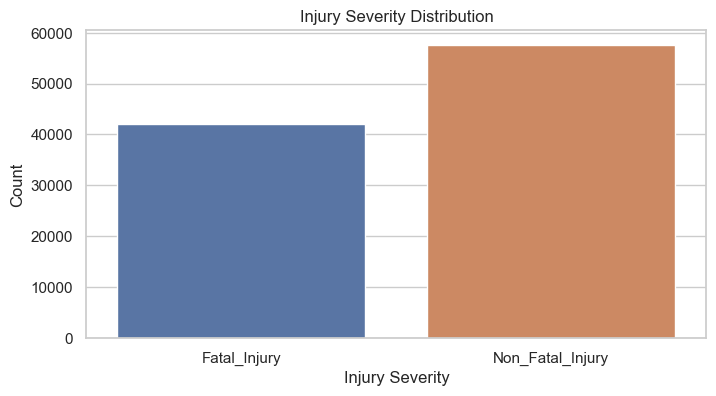

In [9]:
# Injury Severity distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='INJURY_SEVERITY', data=fars_data, hue='INJURY_SEVERITY')
plt.title('Injury Severity Distribution')
plt.xticks()
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.show()

**Removing Duplicates**

In [10]:
# Remove duplicate rows from the dataframe
fars_data = fars_data.drop_duplicates()

**Label Encoding**

Here I am label encoding the Injury Severity column with Non_Fatal_Injury being 0 and Fatal_Injury being 1.

In [11]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
fars_data['INJURY_SEVERITY'] = label_encoder.fit_transform(fars_data['INJURY_SEVERITY'])

Here I am about to label encode all the categorical values in my dataset

In [12]:
# Loop through each column in the dataframe
for column in fars_data.columns:
    # If the column is of type object (categorical), we convert it to labels
    if fars_data[column].dtype == 'object':
        fars_data[column] = label_encoder.fit_transform(fars_data[column])

In [13]:
fars_data.describe()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
count,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,...,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000,89541.000000
mean,23.470421,36.686244,0.660725,3.181593,5.953329,6.430976,5.001854,0.270658,1.169509,0.901096,...,100.697669,2.255470,95.471248,6.097877,1.077317,26.816911,27.923912,18.997286,12.751779,0.537173
std,15.096441,21.161266,0.480002,2.562363,4.664498,1.846810,3.090233,0.679641,2.932685,0.330494,...,295.299926,0.907499,291.966019,1.115179,0.989309,3.421559,1.989768,0.782903,3.239762,0.498619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,20.000000,0.000000,1.000000,3.000000,5.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,5.000000,0.000000,27.000000,28.000000,19.000000,11.000000,0.000000
50%,22.000000,33.000000,1.000000,1.000000,3.000000,7.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,6.000000,2.000000,27.000000,28.000000,19.000000,11.000000,1.000000
75%,38.000000,49.000000,1.000000,6.000000,6.000000,7.000000,9.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,6.000000,2.000000,27.000000,28.000000,19.000000,15.000000,1.000000
max,50.000000,99.000000,2.000000,9.000000,25.000000,11.000000,12.000000,3.000000,9.000000,2.000000,...,999.000000,6.000000,999.000000,8.000000,2.000000,44.000000,46.000000,32.000000,17.000000,1.000000


Now that all the columns have been encoded it is time to produce the correlation of all the variables in the dataset.

**Data Scalling**

The variability observed in the values of the described variables suggests that scaling the data would be beneficial. By normalizing these values, we can ensure that each variable contributes equally to the analysis, avoiding any bias due to differing scales. 

In [14]:
# Select only the feature columns for scaling
features = fars_data.drop('INJURY_SEVERITY', axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(features)

# Scaled Features
scaled_fars_data = pd.DataFrame(scaled_features, index=fars_data.index, columns=features.columns)

# Add the non-scaled target variable back into the scaled features DataFrame
final_scaled_fars= scaled_fars_data.assign(INJURY_SEVERITY=fars_data['INJURY_SEVERITY'])

**Correlation Matrix**

Now that all variables are standardized to the same scale, I will generate a correlation matrix. This matrix will illuminate which variables have the strongest correlation with the "INJURY_SEVERITY" variable, as well as their interrelations with each other. This step is crucial for identifying potential predictors and understanding the interdependencies within the dataset.

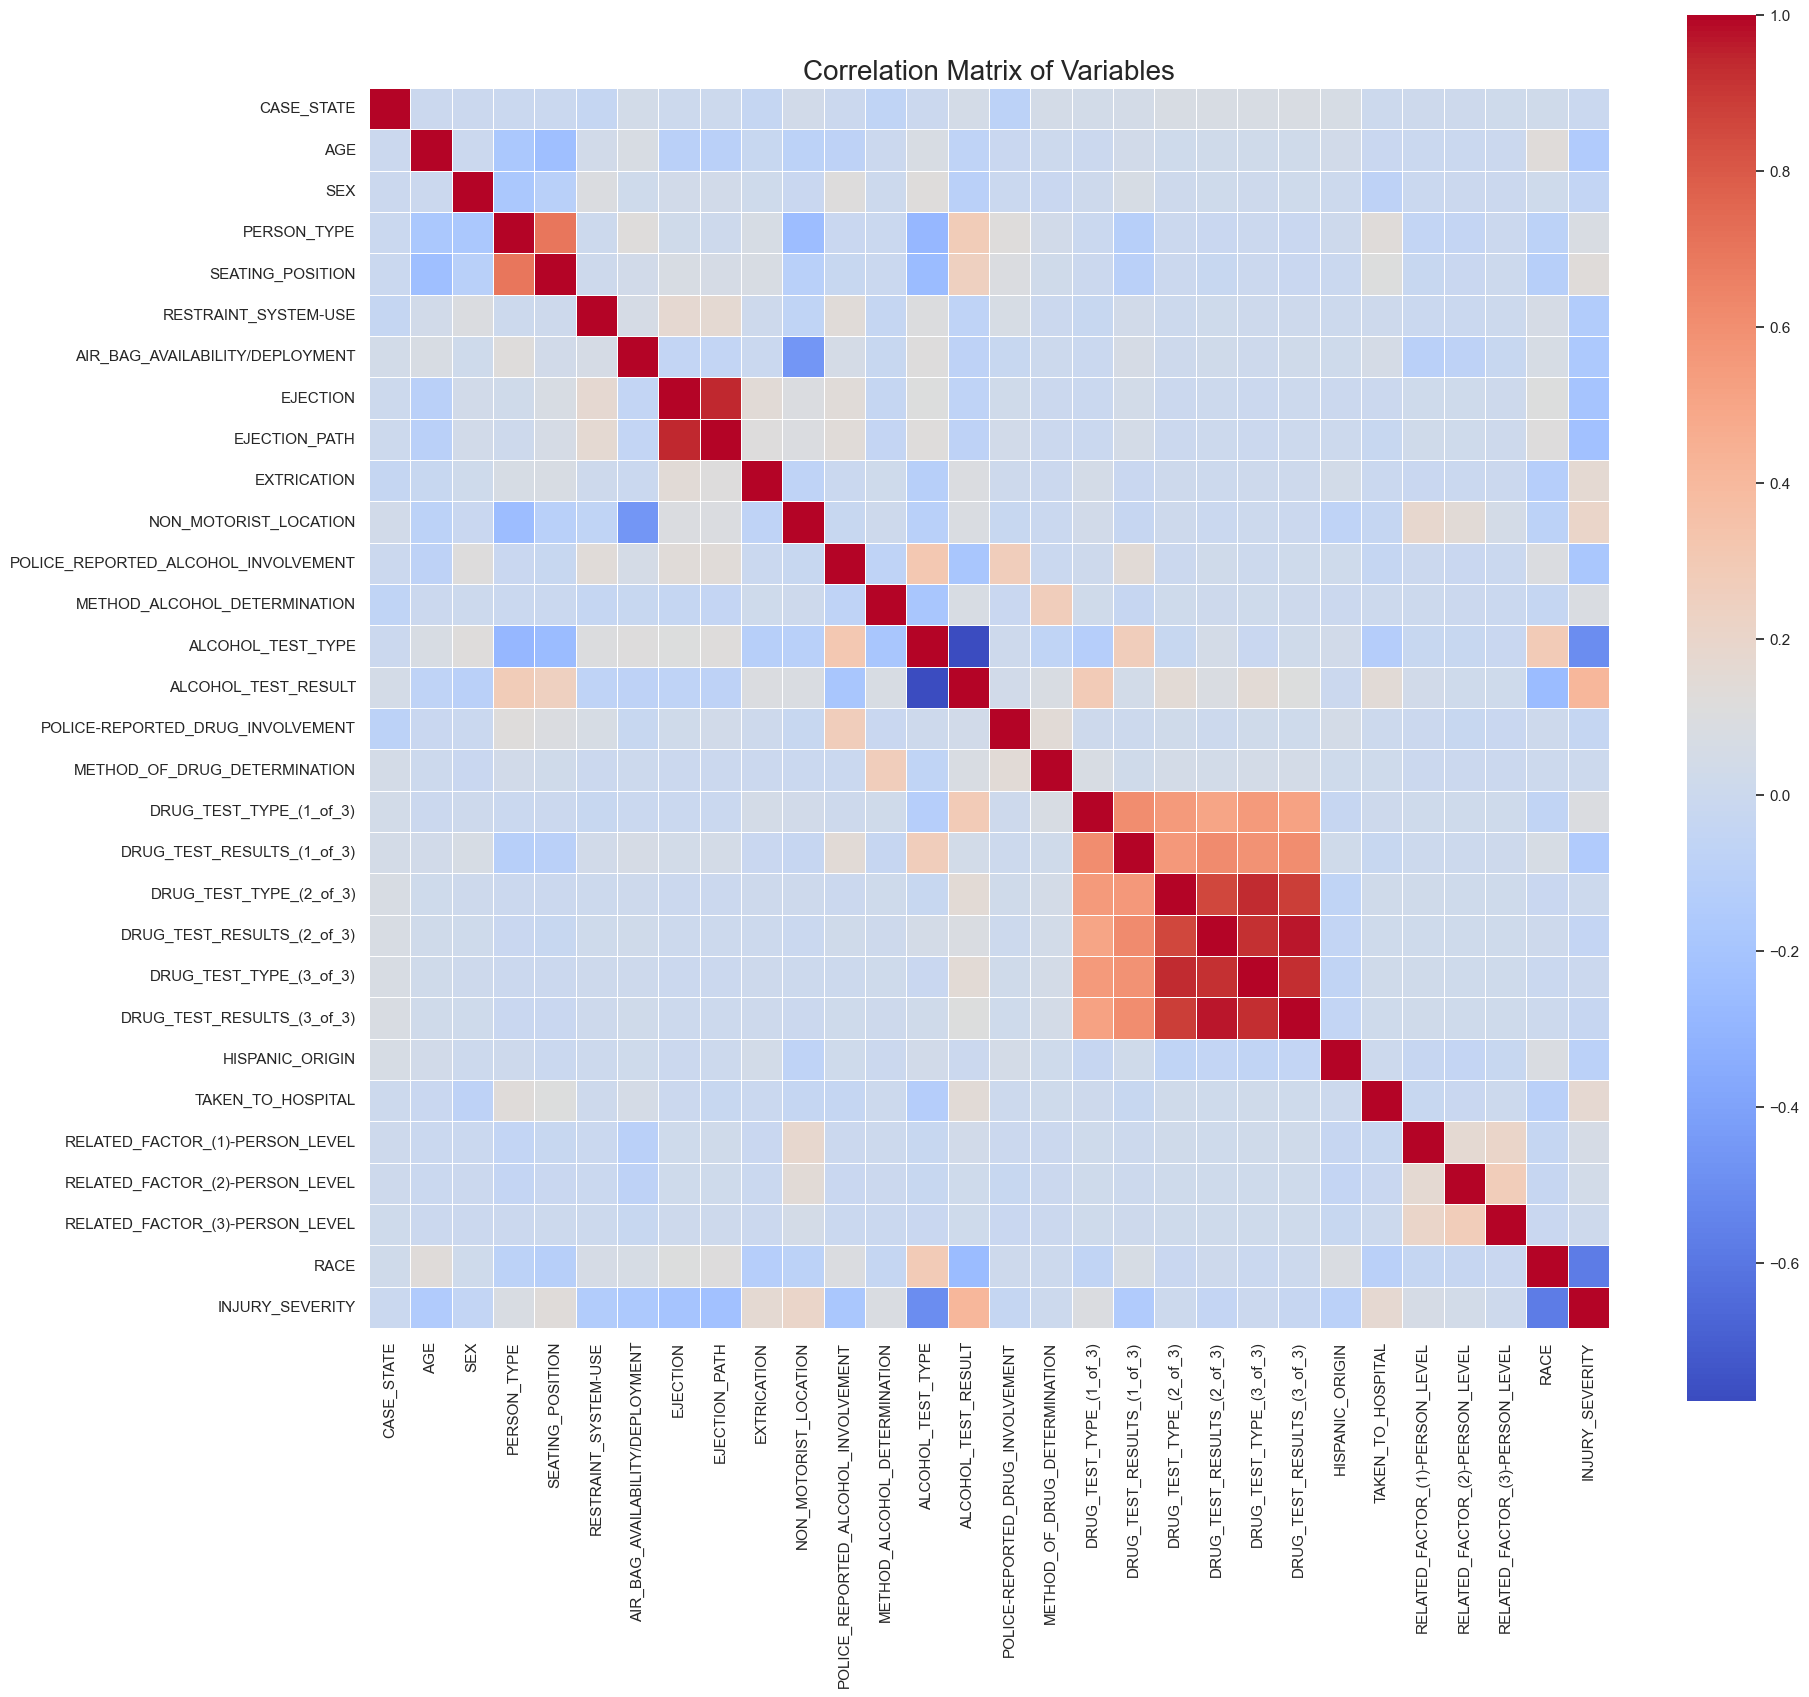

In [15]:
# Calculate the correlation matrix
corr = final_scaled_fars.corr()

# Set up the matplotlib figure with a larger size for better readability
plt.figure(figsize=(20, 18))

# Add a title to the heatmap
plt.title('Correlation Matrix of Variables', fontsize=20)

# Draw the heatmap without annotations for clarity
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=.5)

# Show the plot
plt.show()

In [16]:
# Extracting the correlations of all features with 'INJURY_SEVERITY'
correlations_with_target = corr['INJURY_SEVERITY'].sort_values(ascending=False)

correlations_with_target

INJURY_SEVERITY                        1.000000
ALCOHOL_TEST_RESULT                    0.414812
NON_MOTORIST_LOCATION                  0.207396
TAKEN_TO_HOSPITAL                      0.173519
EXTRICATION                            0.162870
SEATING_POSITION                       0.127916
DRUG_TEST_TYPE_(1_of_3)                0.095012
METHOD_ALCOHOL_DETERMINATION           0.087795
PERSON_TYPE                            0.082662
RELATED_FACTOR_(1)-PERSON_LEVEL        0.057321
RELATED_FACTOR_(2)-PERSON_LEVEL        0.041827
RELATED_FACTOR_(3)-PERSON_LEVEL        0.009485
DRUG_TEST_TYPE_(2_of_3)                0.004411
METHOD_OF_DRUG_DETERMINATION           0.001394
DRUG_TEST_TYPE_(3_of_3)               -0.001106
CASE_STATE                            -0.011767
DRUG_TEST_RESULTS_(3_of_3)            -0.028662
POLICE-REPORTED_DRUG_INVOLVEMENT      -0.039668
DRUG_TEST_RESULTS_(2_of_3)            -0.041552
SEX                                   -0.048726
HISPANIC_ORIGIN                       -0

The list above delineates the correlations with the "INJURY_SEVERITY" variable, encompassing both positive and negative associations. It is imperative to consider both types of correlations in the analysis beacuase positive correlations can help identify risk factors or conditions that exacerbate the situation and on the other hand, negative correlations are equally important as they can point towards protective factors or conditions that might mitigate a situation.

**Chi-Square test**

The Chi-Square test is a statistical method used to assess the relationship between two categorical variables. It compares observed frequencies in a contingency table with expected frequencies calculated under the assumption of no association. A significant Chi-Square value indicates a meaningful association between the variables.

In [17]:
# Preparing the target variable
y = fars_data['INJURY_SEVERITY']

# Choose the number of top features to select
k = 15

# Applying SelectKBest with the Chi-Square test
chi_selector = SelectKBest(chi2, k=k)
X_kbest = chi_selector.fit_transform(features, y)

# Getting the selected features
selected_features = pd.DataFrame({
    'Feature': features.columns,
    'Score': chi_selector.scores_
}).sort_values(by='Score', ascending=False).head(k)

print(selected_features)

                                Feature         Score
18           DRUG_TEST_RESULTS_(1_of_3)  1.472903e+06
14                  ALCOHOL_TEST_RESULT  4.473201e+05
20           DRUG_TEST_RESULTS_(2_of_3)  1.338791e+05
22           DRUG_TEST_RESULTS_(3_of_3)  6.567698e+04
8                         EJECTION_PATH  3.255307e+04
28                                 RACE  2.500712e+04
1                                   AGE  2.470435e+04
13                    ALCOHOL_TEST_TYPE  2.097102e+04
7                              EJECTION  6.494299e+03
4                      SEATING_POSITION  5.354466e+03
6       AIR_BAG_AVAILABILITY/DEPLOYMENT  4.878579e+03
11  POLICE_REPORTED_ALCOHOL_INVOLVEMENT  2.805181e+03
24                    TAKEN_TO_HOSPITAL  2.449233e+03
3                           PERSON_TYPE  1.262606e+03
10                NON_MOTORIST_LOCATION  1.065412e+03


**Recursive Feature Elimination (RFE)**

RFE is a feature selection technique that iteratively removes the least significant features to select the most critical ones for a predictive model. Starting with all features, it builds a model and eliminates the least important feature at each iteration. This process continues until the specified number of features is reached, identifying those most influential for the model's performance.

In [18]:
# Initialize a logistic regression model
model = LogisticRegression(max_iter=3000)

# Initialize RFE with the logistic regression model, selecting 10 features
rfe = RFE(model, n_features_to_select=15)

# Fit RFE
rfe.fit(scaled_fars_data, y)

# Get the ranking of the features
ranking = rfe.ranking_

# Get the mask of selected features
selected = rfe.support_

# Creating a DataFrame to display feature rankings
feature_ranking = pd.DataFrame({
    'Feature': scaled_fars_data.columns,
    'Selected': selected,
    'Ranking': ranking
})

print(feature_ranking.sort_values(by='Ranking'))

                                Feature  Selected  Ranking
14                  ALCOHOL_TEST_RESULT      True        1
24                    TAKEN_TO_HOSPITAL      True        1
18           DRUG_TEST_RESULTS_(1_of_3)      True        1
17              DRUG_TEST_TYPE_(1_of_3)      True        1
15     POLICE-REPORTED_DRUG_INVOLVEMENT      True        1
13                    ALCOHOL_TEST_TYPE      True        1
10                NON_MOTORIST_LOCATION      True        1
9                           EXTRICATION      True        1
28                                 RACE      True        1
6       AIR_BAG_AVAILABILITY/DEPLOYMENT      True        1
5                  RESTRAINT_SYSTEM-USE      True        1
4                      SEATING_POSITION      True        1
3                           PERSON_TYPE      True        1
8                         EJECTION_PATH      True        1
1                                   AGE      True        1
25      RELATED_FACTOR_(1)-PERSON_LEVEL     False       

Having the results of the above techniques and correlations I concluded to use the 10 features that have the most impact in the Injury_Severity variable.

In [19]:
columns_to_keep = [
    'AGE', 
    'EJECTION_PATH', 
    'EXTRICATION', 
    'TAKEN_TO_HOSPITAL',
    'SEATING_POSITION', 
    'NON_MOTORIST_LOCATION',
    'DRUG_TEST_RESULTS_(1_of_3)',
    'AIR_BAG_AVAILABILITY/DEPLOYMENT',
    'ALCOHOL_TEST_TYPE',
    'ALCOHOL_TEST_RESULT', 
    'INJURY_SEVERITY'
]

# Select only the specified columns
fars_final = final_scaled_fars[columns_to_keep]

In [20]:
fars_final

,AGE,EJECTION_PATH,EXTRICATION,TAKEN_TO_HOSPITAL,SEATING_POSITION,NON_MOTORIST_LOCATION,DRUG_TEST_RESULTS_(1_of_3),AIR_BAG_AVAILABILITY/DEPLOYMENT,ALCOHOL_TEST_TYPE,ALCOHOL_TEST_RESULT,INJURY_SEVERITY
0,-0.126942,2.670091,0.299264,-1.088964,-0.633154,0.238456,1.947050,-0.971406,1.253713,0.738126,0
1,-0.788532,2.670091,0.299264,-1.088964,-0.633154,0.238456,-0.539393,1.293808,-0.851277,0.715097,0
2,0.298365,-0.398787,-2.726529,-1.088964,-0.633154,0.238456,-0.539393,-0.324202,-0.851277,0.715097,0
3,0.062083,-0.398787,-2.726529,0.932659,0.010006,0.238456,-0.539393,-0.324202,-0.851277,0.715097,1
4,0.629160,-0.398787,0.299264,0.932659,-0.633154,0.238456,1.947050,1.293808,1.253713,0.738126,0
...,...,...,...,...,...,...,...,...,...,...,...
100963,-1.261096,-0.398787,0.299264,0.932659,1.510712,0.238456,-0.539393,-0.324202,-0.851277,0.715097,1
100964,-1.308353,-0.398787,0.299264,0.932659,2.153871,0.238456,-0.539393,-0.324202,-0.851277,0.715097,1
100965,-1.402865,-0.398787,0.299264,0.932659,1.725098,0.238456,-0.539393,-0.324202,-0.851277,0.715097,1
100966,-1.544635,-0.398787,0.299264,0.932659,1.725098,0.238456,-0.539393,-0.324202,-0.851277,0.715097,1


**Data Spliting**

In [21]:
# Separating the features and the target variable
X = fars_final.drop('INJURY_SEVERITY', axis=1)
y = fars_final['INJURY_SEVERITY']

# Splitting the dataset into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
# Printing the shapes of the datasets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (53724, 10) (53724,)
Validation Set Shape: (17908, 10) (17908,)
Test Set Shape: (17909, 10) (17909,)


In [23]:
# Count the occurrences of each category in 'INJURY_SEVERITY'
injury_severity_distribution = y_train.value_counts()

# Print the distribution
print("Distribution of INJURY_SEVERITY in Training Data:")
print(injury_severity_distribution)

Distribution of INJURY_SEVERITY in Training Data:
INJURY_SEVERITY
1    28770
0    24954
Name: count, dtype: int64


**Resample the Data**

In order to address the imbalance in the training dataset, where the majority of samples belong to the "1" category, it's essential to apply an upsampling technique to the "0" category. This approach aims to balance the dataset and mitigate potential bias in the model training process. By increasing the representation of the minority class ("0" category), we can ensure that our model doesn't overly favor the majority class and is better equipped to accurately predict both classes.

In [24]:
# Separate majority and minority classes
majority_class = X_train[y_train == 1]
minority_class = X_train[y_train == 0]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # sample with replacement
                              n_samples=len(majority_class),  # to match majority class
                              random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
X_train = pd.concat([majority_class, minority_upsampled])
y_train = pd.concat([y_train[y_train == 1], y_train[y_train == 0].loc[minority_upsampled.index]])

In [25]:
# Count the occurrences of each category in 'INJURY_SEVERITY'
injury_severity_distribution = y_train.value_counts()

# Print the distribution
print("Distribution of INJURY_SEVERITY in Training Data:")
print(injury_severity_distribution)

Distribution of INJURY_SEVERITY in Training Data:
INJURY_SEVERITY
1    28770
0    28770
Name: count, dtype: int64


## **Classifiers**

I am preparing to develop three distinct classifiers: Logistic Regression, Gradient Boosting (XGBoost), and Random Forest. The methodology for each classifier will follow a consistent, structured approach to ensure a comprehensive evaluation of their performance.

1. **Initial Model Training:** Each classifier will first be trained in its default, untuned state. This initial step is crucial to establish a baseline performance for each model.

2. **Performance Evaluation on Training and Validation Data:** After training, I will assess and document the performance of each untuned classifier on both the training and validation datasets. This step is important to understand the initial effectiveness of each model and to identify any potential issues such as overfitting or underfitting.

3. **Hyperparameter Tuning with GridSearchCV, RandomizedSearchCV and Cross-Validation:** Following the initial assessment, I will employ GridSearchCV/RandomizedSearchCV combined with cross-validation to optimize the hyperparameters for each model. This process involves exhaustively searching through a specified range of hyperparameter values and evaluating the models using a cross-validation method. This approach ensures that the tuned models are not just tailored to the training data, but have generalized well across multiple subsets of the data.

4. **Evaluating Tuned Models on Validation Data:** Once the best set of hyperparameters for each model is identified, I will evaluate these optimized models on the validation dataset. This step is crucial to assess the improvements in performance due to hyperparameter tuning and to ensure that the models maintain their generalization capabilities.

5. **Final Testing on Unseen Data:** The last step involves applying the best-performing version of each classifier—post hyperparameter tuning—to the test dataset, which represents unseen data. This final evaluation will provide the most realistic assessment of how each model is expected to perform in real-world scenarios, where it encounters data it has never seen before.

### **Logistic Regression**

**Untuned Model**

In [26]:
# Define the logistic regression model
lr_model = LogisticRegression(max_iter=3000)

# Define K-Fold for cross-validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

lr_model.fit(X_train, y_train)

# Evaluate on training and validation set using the untuned model
y_val_pred_lr_untuned = lr_model.predict(X_val)
y_train_pred_lr_untuned = lr_model.predict(X_train)

lr_untuned_train_accuracy = accuracy_score(y_train, y_train_pred_lr_untuned) * 100
lr_untuned_train_precision = precision_score(y_train, y_train_pred_lr_untuned, average='weighted') * 100
lr_untuned_train_recall = recall_score(y_train, y_train_pred_lr_untuned, average='weighted') * 100
lr_untuned_train_f1 = f1_score(y_train, y_train_pred_lr_untuned, average='weighted') * 100

lr_untuned_val_accuracy = accuracy_score(y_val, y_val_pred_lr_untuned) * 100
lr_untuned_val_precision = precision_score(y_val, y_val_pred_lr_untuned, average='weighted') * 100
lr_untuned_val_recall = recall_score(y_val, y_val_pred_lr_untuned, average='weighted') * 100
lr_untuned_val_f1 = f1_score(y_val, y_val_pred_lr_untuned, average='weighted') * 100

print(f"Accuracy of training set (Untuned LR): {lr_untuned_train_accuracy:.2f}%")
print(f"Precision of training set (Untuned LR): {lr_untuned_train_precision:.2f}%")
print(f"Recall of training set (Untuned LR): {lr_untuned_train_recall:.2f}%")
print(f"F1 Score of training set (Untuned LR): {lr_untuned_train_f1:.2f}%")
print("\n")
print(f"Accuracy of validation set (Untuned LR): {lr_untuned_val_accuracy:.2f}%")
print(f"Precision of validation set (Untuned LR): {lr_untuned_val_precision:.2f}%")
print(f"Recall of validation set (Untuned LR): {lr_untuned_val_recall:.2f}%")
print(f"F1 Score of validation set (Untuned LR): {lr_untuned_val_f1:.2f}%")

Accuracy of training set (Untuned LR): 77.72%
Precision of training set (Untuned LR): 77.73%
Recall of training set (Untuned LR): 77.72%
F1 Score of training set (Untuned LR): 77.71%


Accuracy of validation set (Untuned LR): 77.62%
Precision of validation set (Untuned LR): 77.66%
Recall of validation set (Untuned LR): 77.62%
F1 Score of validation set (Untuned LR): 77.63%


**Hyperparameters Tuning**

In [27]:
# Define the parameter grid
param_grid = { 
    'C': [0.001, 0.1, 1, 10],
    'penalty':['l2'],
    'solver': ['sag','saga','newton-cg', 'lbfgs']
}

# Create GridSearchCV
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=kfold, scoring='accuracy')

# Perform the grid search
grid_search_lr.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Logistic Regression: ", grid_search_lr.best_params_)

Best Parameters for Logistic Regression:  {'C': 0.001, 'penalty': 'l2', 'solver': 'sag'}


**Tuned Model Evaluation on Validation Data**

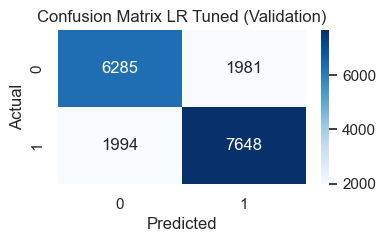



Accuracy of validation set (Logistic Regression Tuned): 77.80%
Precision of validation set (Logistic Regression Tuned): 77.81%
Recall of validation set (Logistic Regression Tuned): 77.80%
F1 Score of validation set (Logistic Regression Tuned): 77.80%


In [28]:
# Get the best model found by GridSearchCV
best_model_lr = grid_search_lr.best_estimator_

# Evaluate on validation set using the best model
y_val_pred_lr = best_model_lr.predict(X_val)

lr_val_accuracy = accuracy_score(y_val, y_val_pred_lr) * 100
lr_val_precision = precision_score(y_val, y_val_pred_lr, average='weighted') * 100
lr_val_recall = recall_score(y_val, y_val_pred_lr, average='weighted') * 100
lr_val_f1 = f1_score(y_val, y_val_pred_lr, average='weighted') * 100

print("\n")

# Confusion Matrix
cm_lr = confusion_matrix(y_val, y_val_pred_lr)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LR Tuned (Validation)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

print(f"Accuracy of validation set (Logistic Regression Tuned): {lr_val_accuracy:.2f}%")
print(f"Precision of validation set (Logistic Regression Tuned): {lr_val_precision:.2f}%")
print(f"Recall of validation set (Logistic Regression Tuned): {lr_val_recall:.2f}%")
print(f"F1 Score of validation set (Logistic Regression Tuned): {lr_val_f1:.2f}%")

**Tuned Model Evaluation on Test Data**

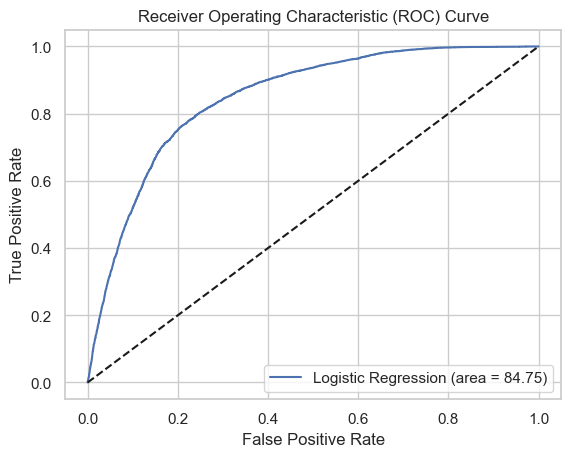



Classification Report for tuned Logistic Regression (Test):
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      8222
           1       0.79      0.80      0.80      9687

    accuracy                           0.78     17909
   macro avg       0.78      0.78      0.78     17909
weighted avg       0.78      0.78      0.78     17909





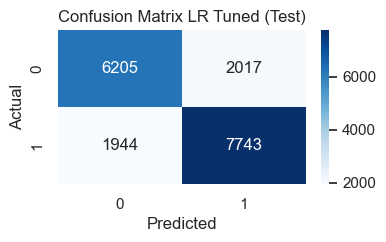



Accuracy of test set (Logistic Regression Tuned): 77.88%
Precision of test set (Logistic Regression Tuned): 77.87%
Recall of test set (Logistic Regression Tuned): 77.88%
F1 Score of test set (Logistic Regression Tuned): 77.87%
ROC AUC Score of test set (Logistic Regression Tuned): 84.75%


In [52]:
# Evaluate on validation set using the best model
y_test_pred_lr = best_model_lr.predict(X_test)
y_test_pred_prob_lr = best_model_lr.predict_proba(X_test)[:, 1]

# Calculate Metrics
lr_test_accuracy = accuracy_score(y_test, y_test_pred_lr) * 100
lr_test_precision = precision_score(y_test, y_test_pred_lr, average='weighted') * 100
lr_test_recall = recall_score(y_test, y_test_pred_lr, average='weighted') * 100
lr_test_f1 = f1_score(y_test, y_test_pred_lr, average='weighted') * 100
lr_test_roc_auc = roc_auc_score(y_test, y_test_pred_prob_lr) * 100

print("\n")

# ROC Curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_test_pred_prob_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % lr_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Classification Report
print(f"Classification Report for tuned Logistic Regression (Test):")
print(classification_report(y_test, y_test_pred_lr))

print("\n")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LR Tuned (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

print(f"Accuracy of test set (Logistic Regression Tuned): {lr_test_accuracy:.2f}%")
print(f"Precision of test set (Logistic Regression Tuned): {lr_test_precision:.2f}%")
print(f"Recall of test set (Logistic Regression Tuned): {lr_test_recall:.2f}%")
print(f"F1 Score of test set (Logistic Regression Tuned): {lr_test_f1:.2f}%")
print(f"ROC AUC Score of test set (Logistic Regression Tuned): {lr_test_roc_auc:.2f}%")

### **Gradient Boosting (XGBoost)**

**Untuned Model**

In [30]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

# Evaluate on training and validation set using the untuned model
y_val_pred_xgb_untuned = xgb_model.predict(X_val)
y_train_pred_xgb_untuned = xgb_model.predict(X_train)

# Calculate evaluation metrics for XGBoost
xgb_untuned_train_accuracy = accuracy_score(y_train, y_train_pred_xgb_untuned) * 100
xgb_untuned_train_precision = precision_score(y_train, y_train_pred_xgb_untuned, average='weighted') * 100
xgb_untuned_train_recall = recall_score(y_train, y_train_pred_xgb_untuned, average='weighted') * 100
xgb_untuned_train_f1 = f1_score(y_train, y_train_pred_xgb_untuned, average='weighted') * 100

xgb_untuned_val_accuracy = accuracy_score(y_val, y_val_pred_xgb_untuned) * 100
xgb_untuned_val_precision = precision_score(y_val, y_val_pred_xgb_untuned, average='weighted') * 100
xgb_untuned_val_recall = recall_score(y_val, y_val_pred_xgb_untuned, average='weighted') * 100
xgb_untuned_val_f1 = f1_score(y_val, y_val_pred_xgb_untuned, average='weighted') * 100

# Print the evaluation metrics for the XGBoost model
print(f"Accuracy of training set (Untuned XGB): {xgb_untuned_train_accuracy:.2f}%")
print(f"Precision of training set (Untuned XGB): {xgb_untuned_train_precision:.2f}%")
print(f"Recall of training set (Untuned XGB): {xgb_untuned_train_recall:.2f}%")
print(f"F1 Score of training set (Untuned XGB): {xgb_untuned_train_f1:.2f}%")
print("\n")
print(f"Accuracy of validation set (Untuned XGB): {xgb_untuned_val_accuracy:.2f}%")
print(f"Precision of validation set (Untuned XGB): {xgb_untuned_val_precision:.2f}%")
print(f"Recall of validation set (Untuned XGB): {xgb_untuned_val_recall:.2f}%")
print(f"F1 Score of validation set (Untuned XGB): {xgb_untuned_val_f1:.2f}%")

Accuracy of training set (Untuned XGB): 83.60%
Precision of training set (Untuned XGB): 83.70%
Recall of training set (Untuned XGB): 83.60%
F1 Score of training set (Untuned XGB): 83.59%


Accuracy of validation set (Untuned XGB): 81.35%
Precision of validation set (Untuned XGB): 81.34%
Recall of validation set (Untuned XGB): 81.35%
F1 Score of validation set (Untuned XGB): 81.32%


**Hyperparameters Tuning**

In [40]:
param_dist_xgb = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.3),
    'gamma': uniform(0, 5)
}

# Number of iterations for random search
n_iter_search = 50

random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, n_iter=n_iter_search, cv=kfold, scoring='accuracy', random_state=42)

# Perform the random search
random_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best Parameters for XGBoost: ", random_search_xgb.best_params_)

Best Parameters for XGBoost:  {'gamma': 0.5502596226383838, 'learning_rate': 0.07838054876258249, 'max_depth': 15, 'n_estimators': 282}


**Tuned Model Evaluation on Validation Data**

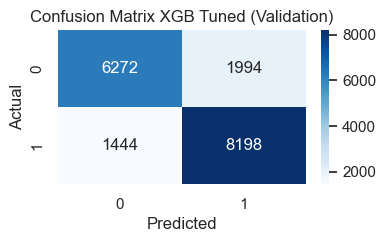



Accuracy of validation set (XGB Tuned): 80.80%
Precision of validation set (XGB Tuned): 80.83%
Recall of validation set (XGB Tuned): 80.80%
F1 Score of validation set (XGB Tuned): 80.74%


In [42]:
# Get the best model
best_model_xgb = random_search_xgb.best_estimator_

# Evaluate on validation set using the best model
y_val_pred_xgb = best_model_xgb.predict(X_val)

# Calculate Metrics for Validation Set
xgb_val_accuracy = accuracy_score(y_val, y_val_pred_xgb) * 100
xgb_val_precision = precision_score(y_val, y_val_pred_xgb, average='weighted') * 100
xgb_val_recall = recall_score(y_val, y_val_pred_xgb, average='weighted') * 100
xgb_val_f1 = f1_score(y_val, y_val_pred_xgb, average='weighted') * 100

# Confusion Matrix for Validation Set
cm_xgb_val = confusion_matrix(y_val, y_val_pred_xgb)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_xgb_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGB Tuned (Validation)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print validation results of the tuned model
print(f"Accuracy of validation set (XGB Tuned): {xgb_val_accuracy:.2f}%")
print(f"Precision of validation set (XGB Tuned): {xgb_val_precision:.2f}%")
print(f"Recall of validation set (XGB Tuned): {xgb_val_recall:.2f}%")
print(f"F1 Score of validation set (XGB Tuned): {xgb_val_f1:.2f}%")

**Tuned Model Evaluation on Test Data**

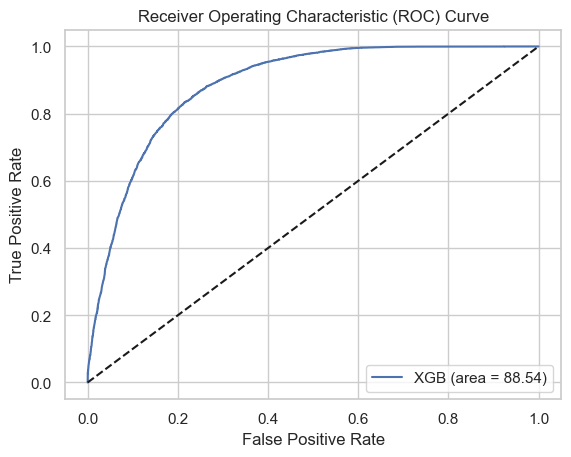




Classification Report for Tuned XGB (Test):
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      8222
           1       0.81      0.86      0.83      9687

    accuracy                           0.81     17909
   macro avg       0.81      0.81      0.81     17909
weighted avg       0.81      0.81      0.81     17909





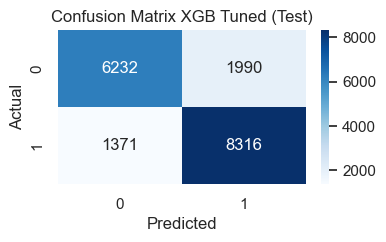



Accuracy of test set (XGB Tuned): 81.23%
Precision of test set (XGB Tuned): 81.28%
Recall of test set (XGB Tuned): 81.23%
F1 Score of test set (XGB Tuned): 81.16%
ROC AUC Score of test set (XGB Tuned): 88.54%


In [53]:
# Evaluate on test set using the best model
y_test_pred_xgb = best_model_xgb.predict(X_test)
y_test_pred_prob_xgb = best_model_xgb.predict_proba(X_test)[:, 1]

# Calculate Metrics for Test Set
xgb_test_accuracy = accuracy_score(y_test, y_test_pred_xgb) * 100
xgb_test_precision = precision_score(y_test, y_test_pred_xgb, average='weighted') * 100
xgb_test_recall = recall_score(y_test, y_test_pred_xgb, average='weighted') * 100
xgb_test_f1 = f1_score(y_test, y_test_pred_xgb, average='weighted') * 100
xgb_test_roc_auc = roc_auc_score(y_test, y_test_pred_prob_xgb) * 100

# ROC Curve for Test Set
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_test_pred_prob_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.2f)' % xgb_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Classification Report for Test Set
print("\nClassification Report for Tuned XGB (Test):")
print(classification_report(y_test, y_test_pred_xgb))

print("\n")

# Confusion Matrix for Test Set
cm_xgb_test = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_xgb_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGB Tuned (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print Test Set Metrics
print(f"Accuracy of test set (XGB Tuned): {xgb_test_accuracy:.2f}%")
print(f"Precision of test set (XGB Tuned): {xgb_test_precision:.2f}%")
print(f"Recall of test set (XGB Tuned): {xgb_test_recall:.2f}%")
print(f"F1 Score of test set (XGB Tuned): {xgb_test_f1:.2f}%")
print(f"ROC AUC Score of test set (XGB Tuned): {xgb_test_roc_auc:.2f}%")

### **Random Forest**

**Untuned Model**

In [44]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

# Fit the untuned model using the resampled training data
rf_model.fit(X_train, y_train)

# Evaluate on training and validation set using the untuned model
y_train_pred_rf_untuned = rf_model.predict(X_train)
y_val_pred_rf_untuned = rf_model.predict(X_val)

# Calculate the performance metrics for the training set
rf_untuned_train_accuracy = accuracy_score(y_train, y_train_pred_rf_untuned) * 100
rf_untuned_train_precision = precision_score(y_train, y_train_pred_rf_untuned, average='weighted') * 100
rf_untuned_train_recall = recall_score(y_train, y_train_pred_rf_untuned, average='weighted') * 100
rf_untuned_train_f1 = f1_score(y_train, y_train_pred_rf_untuned, average='weighted') * 100

# Calculate the performance metrics for the validation set
rf_untuned_val_accuracy = accuracy_score(y_val, y_val_pred_rf_untuned) * 100
rf_untuned_val_precision = precision_score(y_val, y_val_pred_rf_untuned, average='weighted') * 100
rf_untuned_val_recall = recall_score(y_val, y_val_pred_rf_untuned, average='weighted') * 100
rf_untuned_val_f1 = f1_score(y_val, y_val_pred_rf_untuned, average='weighted') * 100

# Print training and validation results of the untuned model
print(f"Accuracy of training set (Untuned RF): {rf_untuned_train_accuracy:.2f}%")
print(f"Precision of training set (Untuned RF): {rf_untuned_train_precision:.2f}%")
print(f"Recall of training set (Untuned RF): {rf_untuned_train_recall:.2f}%")
print(f"F1 Score of training set (Untuned RF): {rf_untuned_train_f1:.2f}%")
print("\n")
print(f"Accuracy of validation set (Untuned RF): {rf_untuned_val_accuracy:.2f}%")
print(f"Precision of validation set (Untuned RF): {rf_untuned_val_precision:.2f}%")
print(f"Recall of validation set (Untuned RF): {rf_untuned_val_recall:.2f}%")
print(f"F1 Score of validation set (Untuned RF): {rf_untuned_val_f1:.2f}%")

Accuracy of training set (Untuned RF): 90.30%
Precision of training set (Untuned RF): 90.39%
Recall of training set (Untuned RF): 90.30%
F1 Score of training set (Untuned RF): 90.29%


Accuracy of validation set (Untuned RF): 78.69%
Precision of validation set (Untuned RF): 78.72%
Recall of validation set (Untuned RF): 78.69%
F1 Score of validation set (Untuned RF): 78.60%


**Hyperparameters Tuning**

In [45]:
# Define the parameter grid for Random Forest
param_grid_rf = {
'n_estimators': [100, 200, 500],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=kfold, scoring='accuracy')

# Perform the grid search using the resampled training data
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)

Best Parameters for Random Forest:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}


**Tuned Model Evaluation on Validation Data**

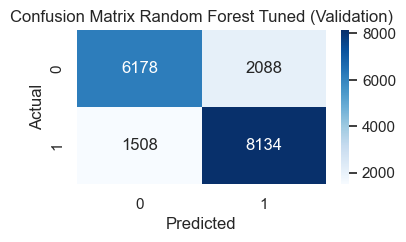



Accuracy of validation set (RF Tuned): 79.92%
Precision of validation set (RF Tuned): 79.95%
Recall of validation set (RF Tuned): 79.92%
F1 Score of validation set (RF Tuned): 79.85%


In [46]:
# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Evaluate on validation set using the best model
y_val_pred_rf = best_model_rf.predict(X_val)

# Calculate Metrics for Validation Set
rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf) * 100
rf_val_precision = precision_score(y_val, y_val_pred_rf, average='weighted') * 100
rf_val_recall = recall_score(y_val, y_val_pred_rf, average='weighted') * 100
rf_val_f1 = f1_score(y_val, y_val_pred_rf, average='weighted') * 100

# Confusion Matrix for Validation Set
cm_rf_val = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_rf_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest Tuned (Validation)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print Validation Set Metrics
print(f"Accuracy of validation set (RF Tuned): {rf_val_accuracy:.2f}%")
print(f"Precision of validation set (RF Tuned): {rf_val_precision:.2f}%")
print(f"Recall of validation set (RF Tuned): {rf_val_recall:.2f}%")
print(f"F1 Score of validation set (RF Tuned): {rf_val_f1:.2f}%")

**Tuned Model Evaluation on Test Data**

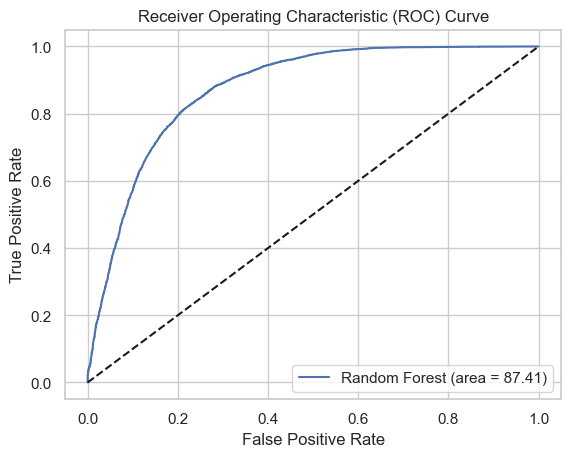




Classification Report for Tuned Random Forest (Test):
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      8222
           1       0.80      0.85      0.82      9687

    accuracy                           0.80     17909
   macro avg       0.80      0.80      0.80     17909
weighted avg       0.80      0.80      0.80     17909





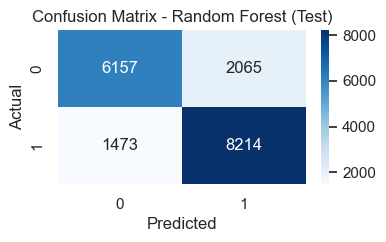



Random Forest - Test Performance (Tuned):
Accuracy of test set (RF Tuned): 80.24%
Precision of test set (RF Tuned): 80.27%
Recall of test set (RF Tuned): 80.24%
F1 Score of test set (RF Tuned): 80.17%
ROC AUC Score of test set (RF Tuned): 87.41%


In [54]:
# Evaluate on test set using the best model
y_test_pred_rf = best_model_rf.predict(X_test)
y_test_pred_prob_rf = best_model_rf.predict_proba(X_test)[:, 1] 

# Calculate Metrics for Test Set
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf) * 100
rf_test_precision = precision_score(y_test, y_test_pred_rf, average='weighted') * 100
rf_test_recall = recall_score(y_test, y_test_pred_rf, average='weighted') * 100
rf_test_f1 = f1_score(y_test, y_test_pred_rf, average='weighted') * 100
rf_test_roc_auc = roc_auc_score(y_test, y_test_pred_prob_rf) * 100

# Plot ROC Curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_test_pred_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % rf_test_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for a no-skill classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\n")

# Classification Report for Test Set
print("\nClassification Report for Tuned Random Forest (Test):")
print(classification_report(y_test, y_test_pred_rf))

print("\n")

# Confusion Matrix for Test Set
cm_rf_test = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Test)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n")

# Print Test Set Metrics
print("Random Forest - Test Performance (Tuned):")
print(f"Accuracy of test set (RF Tuned): {rf_test_accuracy:.2f}%")
print(f"Precision of test set (RF Tuned): {rf_test_precision:.2f}%")
print(f"Recall of test set (RF Tuned): {rf_test_recall:.2f}%")
print(f"F1 Score of test set (RF Tuned): {rf_test_f1:.2f}%")
print(f"ROC AUC Score of test set (RF Tuned): {rf_test_roc_auc:.2f}%")

## **Classifiers Performance Evaluation**

In [55]:
# Create a dictionary with the metrics
metrics_test = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest'],
    'F1 Score (%)': [lr_test_f1, xgb_test_f1, rf_test_f1],
    'Accuracy (%)': [lr_test_accuracy, xgb_test_accuracy, rf_test_accuracy],
    'Precision (%)': [lr_test_precision, xgb_test_precision, rf_test_precision,],
    'Recall (%)': [lr_test_recall, xgb_test_recall, rf_test_recall],
    'ROC AUC (%)': [lr_test_roc_auc, xgb_test_roc_auc, rf_test_roc_auc]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_test).sort_values(by='F1 Score (%)', ascending=False)

# Convert the DataFrame to HTML
html = metrics_df.to_html(index=False)

# Custom CSS to style the table and caption
css = """
<style type='text/css'>
    .dataframe th, .dataframe td {
        text-align: left;
    }

    .dataframe th:first-child { 
        text-align: left; 
    }

    #caption {
        font-size: 24px;
        font-weight: bold;
        color: white;
        text-align: left;
        margin-bottom: 10px;
    }
    
</style>
"""

# Custom HTML for the caption
caption_html = "<div id='caption'>Final Models Evaluation - Test Set</div>"

# Combine CSS, caption HTML, and DataFrame HTML
html_styled = css + caption_html + html

# To display in Jupyter Notebook
from IPython.core.display import HTML
HTML(html_styled)

Model,F1 Score (%),Accuracy (%),Precision (%),Recall (%),ROC AUC (%)
XGBoost,81.156382,81.232900,81.277030,81.232900,88.541598
Random Forest,80.168560,80.244570,80.270490,80.244570,87.411802
Logistic Regression,77.874829,77.882629,77.869627,77.882629,84.754112


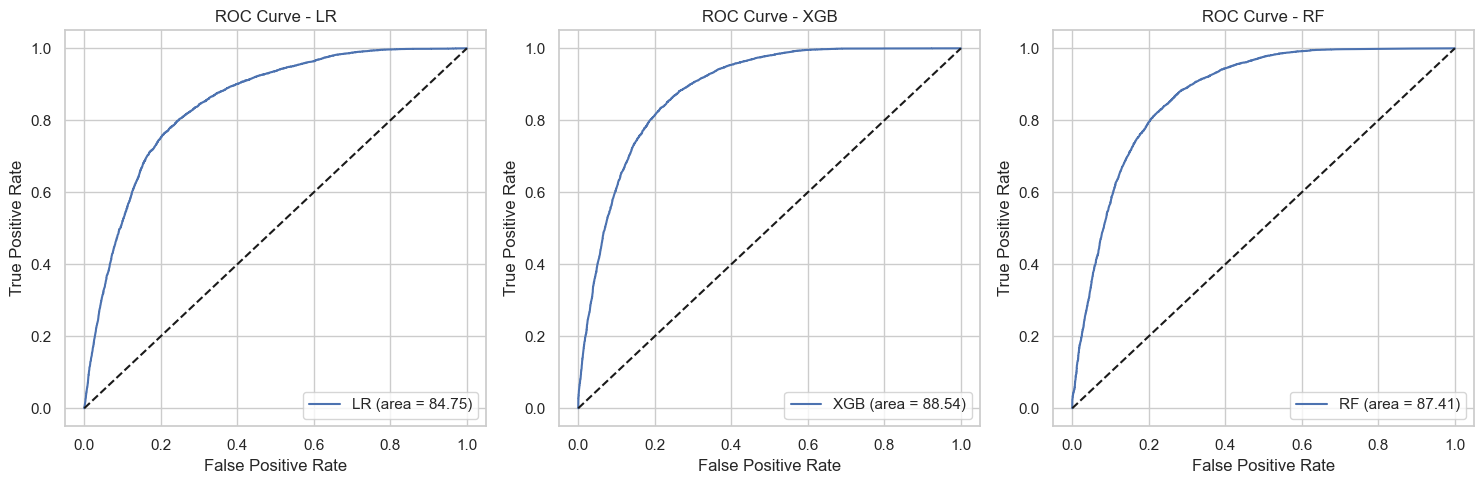

In [58]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot ROC Curve for LR
axs[0].plot(fpr_lr, tpr_lr, label='LR (area = %0.2f)' % lr_test_roc_auc)
axs[0].plot([0, 1], [0, 1], 'k--')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve - LR')
axs[0].legend(loc="lower right")

# Plot ROC Curve for XGB
axs[1].plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.2f)' % xgb_test_roc_auc)
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve - XGB')
axs[1].legend(loc="lower right")

# Plot ROC Curve for RF
axs[2].plot(fpr_rf, tpr_rf, label='RF (area = %0.2f)' % rf_test_roc_auc)
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('ROC Curve - RF')
axs[2].legend(loc="lower right")

# Display the combined plot
plt.tight_layout()
plt.show()

### **About Metrics**

**F1 Score**: The F1 Score is the weighted average of Precision and Recall. It is a more reliable measure than accuracy, especially with uneven class distribution, as it takes both false positives and false negatives into account.

**Accuracy**: This metric represents the overall correctness of the model, defined as the proportion of true results (both true positives and true negatives) among the total number of cases examined. A higher accuracy indicates that the model can correctly classify a higher percentage of instances.

**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false-positive rate.

**Recall**: Also known as sensitivity, recall is the ratio of correctly predicted positive observations to all observations in the actual class. It's crucial in cases where missing a positive instance is more detrimental than falsely labeling negative instances as positive.

**ROC AUC**: The ROC AUC score measures a model's ability to differentiate between classes. An AUC score of 1 indicates perfect classification, while 0.5 suggests no better than random guessing.

### **Models Performance**

In evaluating the performance of three machine learning models—XGBoost, Random Forest, and Logistic Regression—across various metrics, we observe distinct trends in their effectiveness. XGBoost emerges as the top performer, showcasing superior balance and high scores in F1 Score (81.16%), Accuracy (81.23%), Precision (81.28%), Recall (81.23%), and ROC AUC (88.54%). These figures indicate its robustness in both correctly classifying cases and maintaining a strong balance between precision and recall. Random Forest follows closely, with marginally lower yet commendable scores, particularly in F1 Score (80.17%) and ROC AUC (87.41%), reflecting its competence in classifying and differentiating between classes. Logistic Regression, though slightly lagging behind with an F1 Score of 77.87% and Accuracy of 77.88%, still presents a reasonable level of effectiveness. While it doesn't match the prowess of XGBoost or Random Forest, it maintains a consistent performance across all metrics. This comparative analysis underscores XGBoost's superiority in handling this specific dataset, with Random Forest as a close alternative, and Logistic Regression as a viable, though less optimal, choice.

### **Confusion Matrix Evaluation**

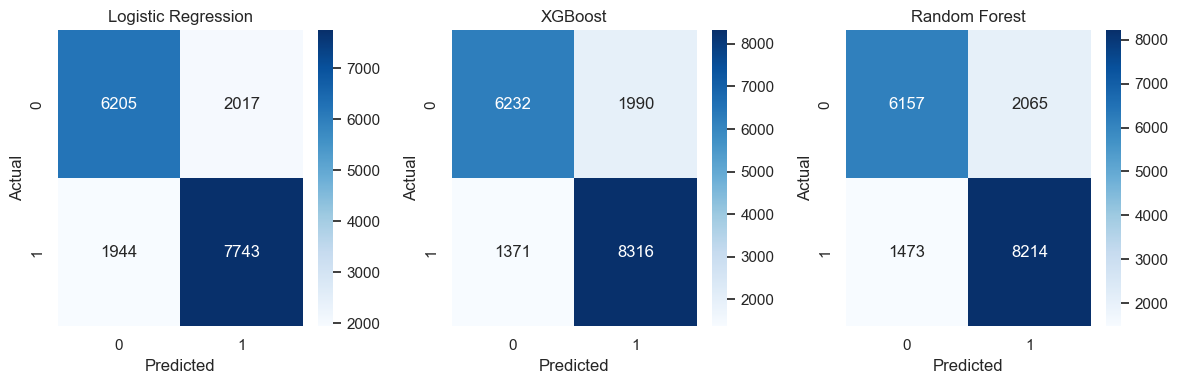

In [56]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Titles for each subplot
titles = ['Logistic Regression', 'XGBoost', 'Random Forest']

# List of confusion matrices
confusion_matrices = [cm_lr, cm_xgb_test, cm_rf_test]

for ax, cm, title in zip(axes.flatten(), confusion_matrices, titles):
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap='Blues')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout for a clean look
plt.tight_layout()
plt.show()

Analyzing the confusion matrices for Logistic Regression (LR), XGBoost (XGB), and Random Forest (RF) reveals distinct patterns in their classification abilities. LR demonstrates a balanced approach, correctly identifying 7743 instances of class 1 (True Positives) and 6205 of class 0 (True Negatives), but it also misclassifies a significant number of instances (2017 False Positives and 1944 False Negatives), indicating a need for improvement in distinguishing between classes. XGB, on the other hand, excels particularly in identifying class 1, with a high count of 8316 True Positives and the lowest False Negatives (1371), showcasing its strength in minimizing missed class 1 instances. However, it also encounters a notable number of False Positives (1990). RF strikes a balance, with 8214 True Positives and 6157 True Negatives, but like the others, it isn't immune to misclassification, as evidenced by 2065 False Positives and 1473 False Negatives. These matrices highlight XGB's superiority in accurately identifying class 1 instances, while LR and RF show commendable, yet slightly less precise, performances. 

**WORD COUNT OF PROJECT (1) : 1824**